Tensor shapes match: (1, 18, 8, 8)
Mean difference in board tensors: 0.0
Maximum absolute difference in board tensors: 0.0
Tensors are equal within the tolerance of 1e-06.


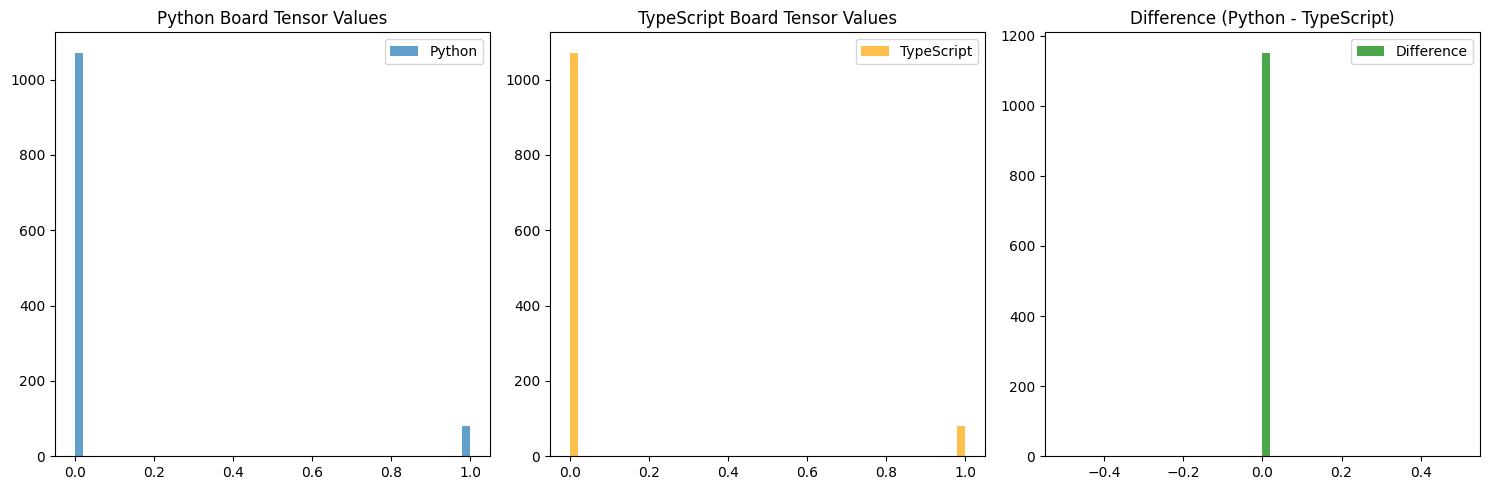

In [13]:
import numpy as np
import json

# Load the Python board tensor
board_python = np.load("python_boards.npy")


# Load the TypeScript board tensor
with open("typescript_boards.json", "r") as f:
    board_typescript_list = json.load(f)

# Convert the TypeScript list to a NumPy array
board_typescript = np.array(list(board_typescript_list.values()), dtype=np.float32)

# Reshape the TypeScript tensor to match the shape of the Python tensor
# Assuming the tensor shape is [1, 18, 8, 8]
board_typescript = board_typescript.reshape(board_python.shape)

np.save("typescript_boards.npy", board_typescript)

# Verify tensor shapes match
if board_python.shape != board_typescript.shape:
    print(
        f"Shape mismatch: Python tensor shape {board_python.shape}, TypeScript tensor shape {board_typescript.shape}"
    )
else:
    print(f"Tensor shapes match: {board_python.shape}")

# Compute the difference between tensors
tensor_diff = board_python - board_typescript

# Compute statistics
mean_diff = np.mean(tensor_diff)
max_diff = np.max(np.abs(tensor_diff))

print(f"Mean difference in board tensors: {mean_diff}")
print(f"Maximum absolute difference in board tensors: {max_diff}")

# Check if tensors are equal within a tolerance
tolerance = 1e-6
if np.allclose(board_python, board_typescript, atol=tolerance):
    print(f"Tensors are equal within the tolerance of {tolerance}.")
else:
    print(f"Tensors differ by more than the tolerance of {tolerance}.")

# Optionally, analyze where the differences occur
diff_indices = np.argwhere(np.abs(tensor_diff) > tolerance)
if diff_indices.size > 0:
    print(f"Number of differing elements: {diff_indices.shape[0]}")
    # Print some examples
    for idx in diff_indices[:5]:  # Show up to 5 differences
        idx_tuple = tuple(idx)
        val_python = board_python[idx_tuple]
        val_typescript = board_typescript[idx_tuple]
        diff = tensor_diff[idx_tuple]
        print(
            f"At index {idx_tuple}: Python={val_python}, TypeScript={val_typescript}, Difference={diff}"
        )

# Optionally, visualize differences
import matplotlib.pyplot as plt

# Flatten the tensors for plotting
board_python_flat = board_python.flatten()
board_typescript_flat = board_typescript.flatten()
tensor_diff_flat = tensor_diff.flatten()

# Plot the tensors
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(board_python_flat, bins=50, alpha=0.7, label="Python")
plt.title("Python Board Tensor Values")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(
    board_typescript_flat,
    bins=50,
    alpha=0.7,
    label="TypeScript",
    color="orange",
)
plt.title("TypeScript Board Tensor Values")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(
    tensor_diff_flat, bins=50, alpha=0.7, label="Difference", color="green"
)
plt.title("Difference (Python - TypeScript)")
plt.legend()

plt.tight_layout()
plt.show()